Project 2: Car Price prediction

Imports libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


Data Collecting and processing

In [3]:
# loading the data
car_dataset=pd.read_csv("/content/car data.csv")

In [4]:
print(car_dataset)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

Fetch the top 5 row of the datasets

In [5]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# fetching some information form the datasets
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Checking for null datas

In [7]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Calculating the Distribution of Categarical data

In [8]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the categorical data's, converting string data into numerical

In [9]:
#encoding fuel type data from the categorical data
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding Seller type data from the categorical data
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding Transmaission data from the categorical data
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [11]:
car_dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the dataset into the Input and Output datas.

In [13]:
X=car_dataset.drop(["Selling_Price","Car_Name"],axis=1)
y=car_dataset["Selling_Price"]

In [14]:
print(X)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting dataset into Training and Testing Data

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

Model Training

1. Linear Regression

In [18]:
# Training the dataset using Linear Regression
Lin_reg_model=LinearRegression()

In [19]:
Lin_reg_model.fit(X_train,y_train)

LinearRegression()

Evaluating the model

In [21]:
# Prediction
training_dataset_prediction=Lin_reg_model.predict(X_train)

Calculating Cost (using mean square value)

In [22]:
#R  Square value method
error=metrics.r2_score(y_train,training_dataset_prediction)
print("R2 Square :",error)

R2 Square : 0.8799451660493711


Visualize the predict v/s Actual data

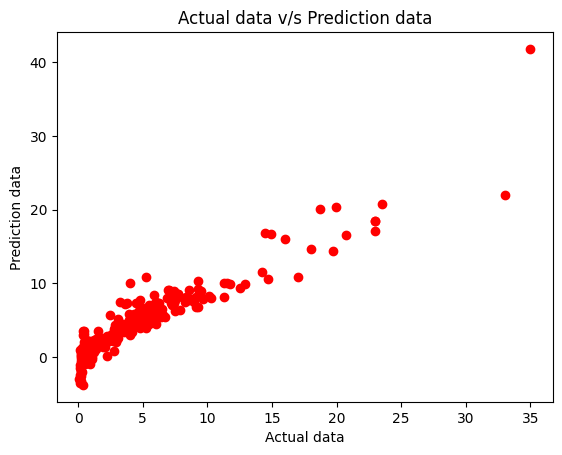

In [27]:
#Used of matplotlib
plt.scatter(y_train,training_dataset_prediction,color="Red")
plt.xlabel("Actual data")
plt.ylabel("Prediction data")
plt.title("Actual data v/s Prediction data")
plt.show()

In [29]:
#prediction for testing data
test_dataset_prediction=Lin_reg_model.predict(X_test)

In [32]:
# R2 Square method
error_score=metrics.r2_score(y_test,test_dataset_prediction)
print("R2 Square:",error_score)

R2 Square: 0.8365766715027051


Visualize the predict v/s Actual data (TESTING DATA)

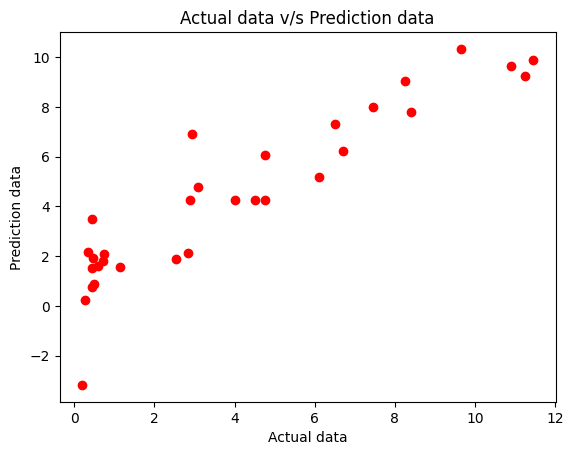

In [33]:
#Used of matplotlib
plt.scatter(y_test,test_dataset_prediction,color="Red")
plt.xlabel("Actual data")
plt.ylabel("Prediction data")
plt.title("Actual data v/s Prediction data")
plt.show()